In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#import os 
#os.environ["OMP_NUM_THREADS"] = "7"

df = pd.read_csv('CVD_cleaned.csv')
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [2]:
#Integer encoding
label_encoder = LabelEncoder()

columns_to_encode = ["General_Health", "Checkup", "Exercise", "Heart_Disease", 
                     "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", 
                     "Arthritis", "Sex", "Age_Category", "Smoking_History"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
    # Display the mapping
    print(f"Column: {column}")
    for original_value, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"   {original_value} -> {encoded_value}")
    print()

Column: General_Health
   Excellent -> 0
   Fair -> 1
   Good -> 2
   Poor -> 3
   Very Good -> 4

Column: Checkup
   5 or more years ago -> 0
   Never -> 1
   Within the past 2 years -> 2
   Within the past 5 years -> 3
   Within the past year -> 4

Column: Exercise
   No -> 0
   Yes -> 1

Column: Heart_Disease
   No -> 0
   Yes -> 1

Column: Skin_Cancer
   No -> 0
   Yes -> 1

Column: Other_Cancer
   No -> 0
   Yes -> 1

Column: Depression
   No -> 0
   Yes -> 1

Column: Diabetes
   No -> 0
   No, pre-diabetes or borderline diabetes -> 1
   Yes -> 2
   Yes, but female told only during pregnancy -> 3

Column: Arthritis
   No -> 0
   Yes -> 1

Column: Sex
   Female -> 0
   Male -> 1

Column: Age_Category
   18-24 -> 0
   25-29 -> 1
   30-34 -> 2
   35-39 -> 3
   40-44 -> 4
   45-49 -> 5
   50-54 -> 6
   55-59 -> 7
   60-64 -> 8
   65-69 -> 9
   70-74 -> 10
   75-79 -> 11
   80+ -> 12

Column: Smoking_History
   No -> 0
   Yes -> 1



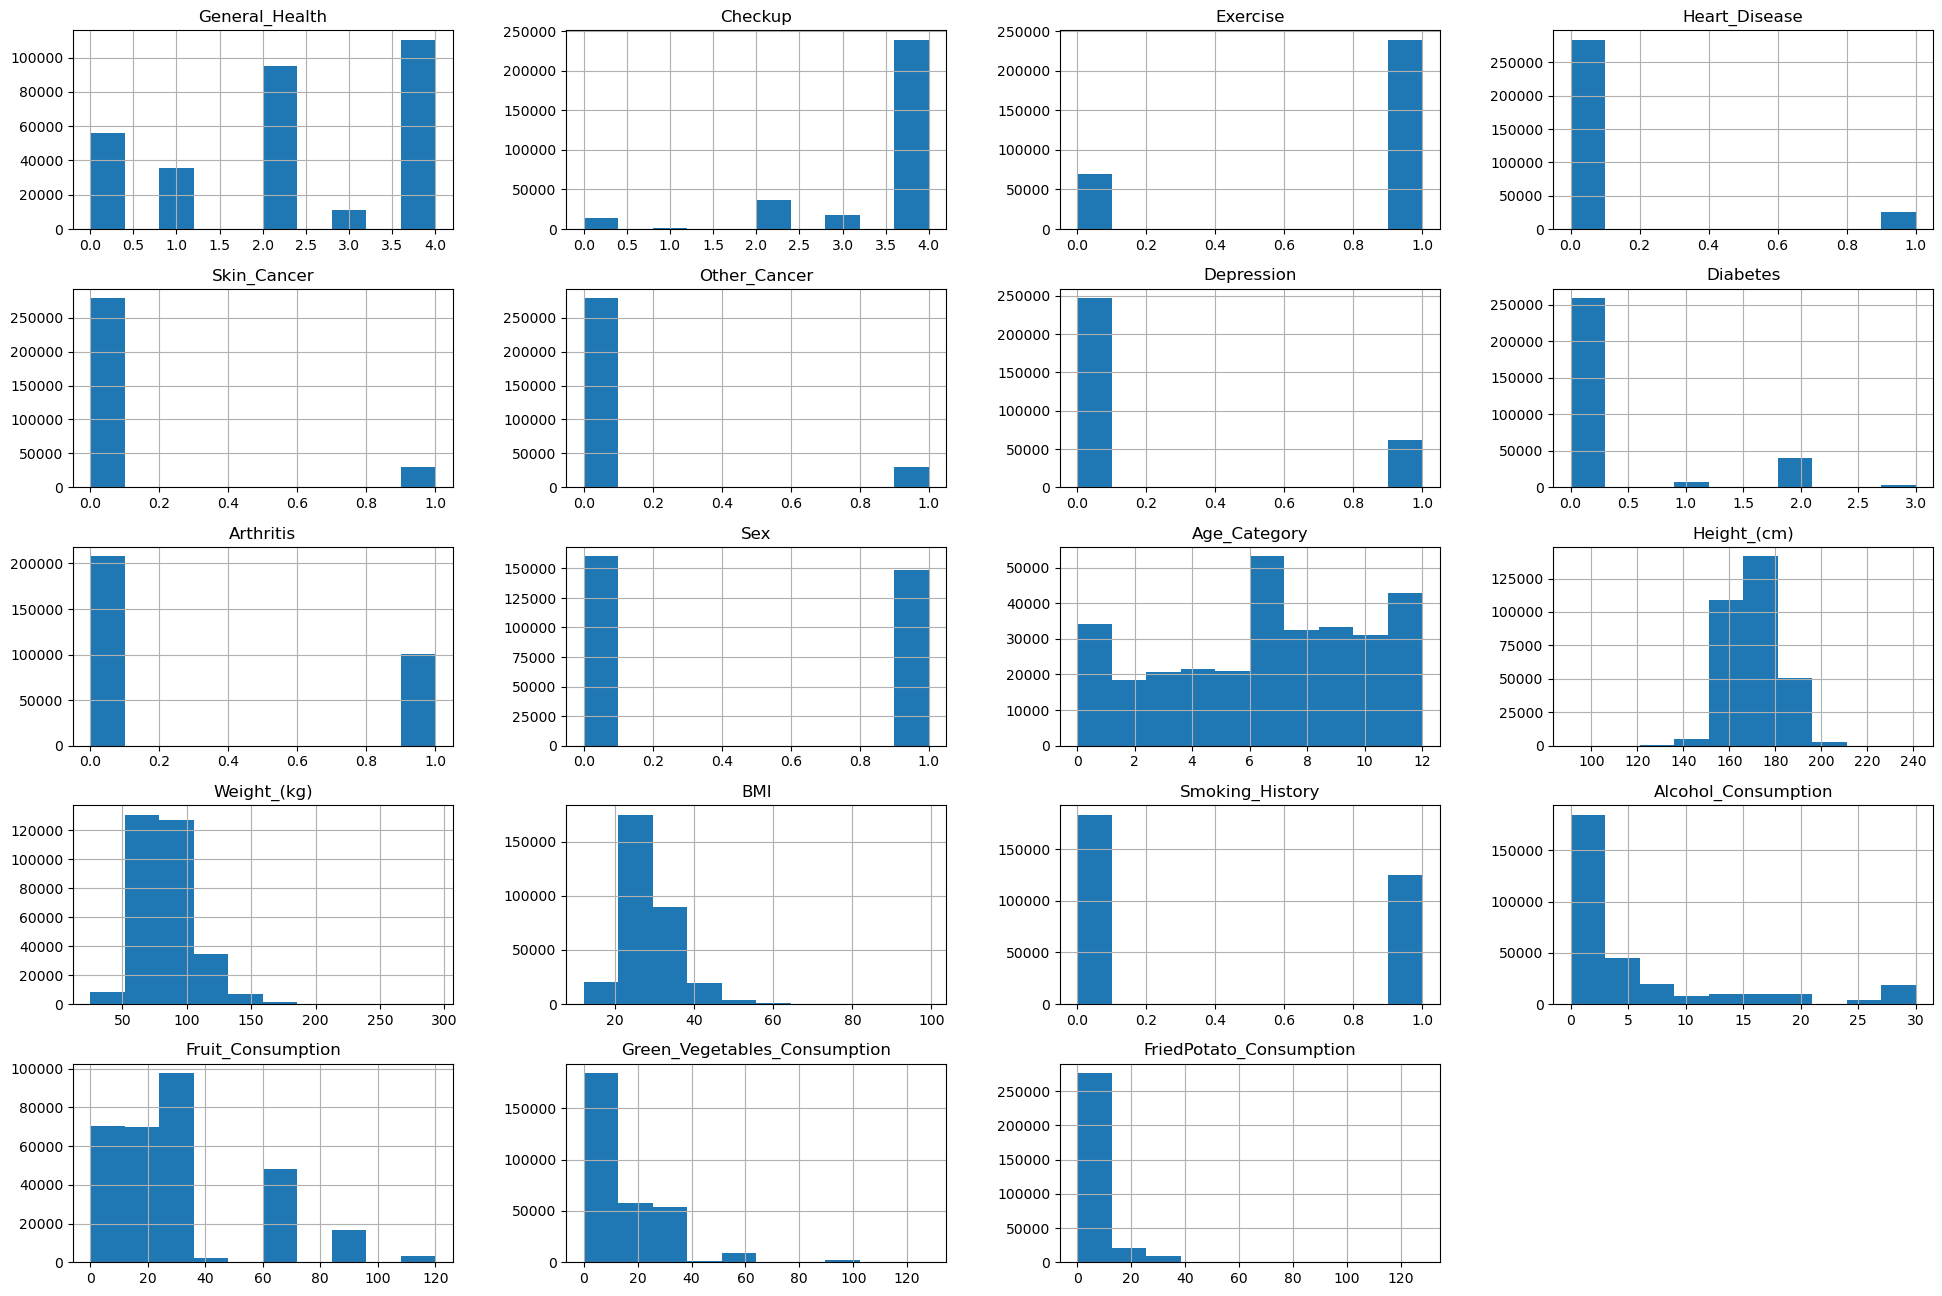

In [3]:
df.hist(figsize=(24, 16))
plt.show()

In [4]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.027445,0.036887,-0.020645,0.020874,0.004457,0.002294,-0.025172,0.014010,-0.013757,0.032383,0.001602,0.014858,0.013979,0.004299,0.023656,-0.010947,-0.021550,-0.000668
Checkup,0.027445,1.000000,-0.029750,0.083480,0.079285,0.086747,0.035632,0.127812,0.150166,-0.100058,0.223067,-0.088958,0.012007,0.060868,-0.010145,-0.046676,0.039310,0.034934,-0.055723
Exercise,0.036887,-0.029750,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.136618,-0.124813,0.059344,-0.122345,0.091618,-0.090144,-0.155756,-0.093295,0.094959,0.136787,0.125002,-0.036930
Heart_Disease,-0.020645,0.083480,-0.096347,1.000000,0.090848,0.092387,0.032526,0.166241,0.153913,0.072595,0.229011,0.015780,0.045875,0.042666,0.107797,-0.036569,-0.020055,-0.024043,-0.009227
Skin_Cancer,0.020874,0.079285,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.032968,0.136178,0.009678,0.272074,0.006812,-0.028954,-0.037619,0.032828,0.042764,0.024123,0.012871,-0.038919
Other_Cancer,0.004457,0.086747,-0.054388,0.092387,0.150824,1.000000,0.015892,0.063898,0.129362,-0.042044,0.234459,-0.043459,-0.021132,0.001047,0.053431,-0.008663,0.007974,-0.003237,-0.033298
Depression,0.002294,0.035632,-0.084729,0.032526,-0.013014,0.015892,1.000000,0.053155,0.121598,-0.141450,-0.103169,-0.091318,0.047936,0.109597,0.100275,-0.028135,-0.039943,-0.051170,0.018138
Diabetes,-0.025172,0.127812,-0.136618,0.166241,0.032968,0.063898,0.053155,1.000000,0.133890,-0.013143,0.192792,-0.043098,0.158219,0.205326,0.053780,-0.114190,-0.019099,-0.027347,-0.004252
Arthritis,0.014010,0.150166,-0.124813,0.153913,0.136178,0.129362,0.121598,0.133890,1.000000,-0.100053,0.370997,-0.097789,0.074104,0.137964,0.123196,-0.024896,-0.002012,-0.018825,-0.050961
Sex,-0.013757,-0.100058,0.059344,0.072595,0.009678,-0.042044,-0.141450,-0.013143,-0.100053,1.000000,-0.060232,0.698167,0.354019,0.010989,0.073402,0.129291,-0.092462,-0.069179,0.130052


In [5]:
sns.pairplot(df)

c:\Users\chasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

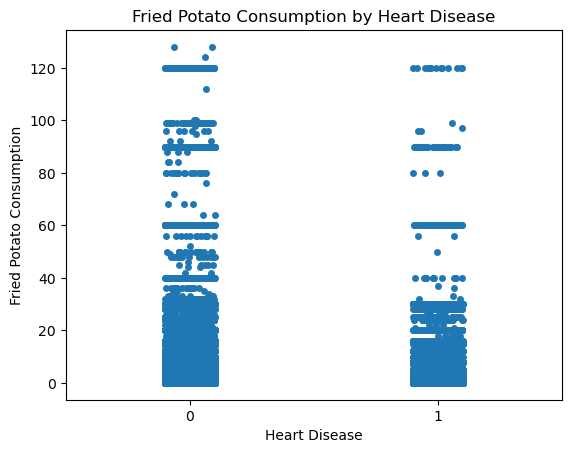

In [ ]:
sns.stripplot(data=df, x="Heart_Disease", y="FriedPotato_Consumption", jitter=True)
plt.title("Fried Potato Consumption by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Fried Potato Consumption")
plt.show()

In [ ]:
#corr_matrix.to_csv("corr.csv")
df2 = df.sample(n=10000, replace=True)

In [ ]:
corr_matrix = df2.corr(numeric_only=True)
corr_matrix

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.032056,0.058350,-0.028573,0.027426,0.009288,-0.008309,-0.028948,0.019647,-0.006297,0.043468,0.011566,0.012238,0.004974,0.015263,0.027722,-0.026316,-0.016369,-0.006866
Checkup,0.032056,1.000000,-0.036039,0.082389,0.087906,0.087166,0.032982,0.136864,0.160127,-0.103091,0.228264,-0.091784,0.000235,0.050830,-0.009835,-0.036930,0.020839,0.032966,-0.054626
Exercise,0.058350,-0.036039,1.000000,-0.104038,-0.011084,-0.056106,-0.081159,-0.140158,-0.123183,0.064043,-0.136853,0.107850,-0.067332,-0.137924,-0.087179,0.095649,0.138158,0.130064,-0.039995
Heart_Disease,-0.028573,0.082389,-0.104038,1.000000,0.086197,0.090831,0.027298,0.165444,0.150022,0.080517,0.234850,0.014999,0.027843,0.021062,0.121476,-0.013460,-0.035158,-0.039154,0.006648
Skin_Cancer,0.027426,0.087906,-0.011084,0.086197,1.000000,0.165870,-0.018928,0.026552,0.151907,0.017072,0.280527,0.012676,-0.033269,-0.044212,0.045941,0.056579,0.010069,0.016774,-0.038746
Other_Cancer,0.009288,0.087166,-0.056106,0.090831,0.165870,1.000000,0.008496,0.055575,0.121647,-0.038675,0.240318,-0.046440,-0.018984,0.007302,0.071663,0.008839,-0.019818,-0.021639,-0.024954
Depression,-0.008309,0.032982,-0.081159,0.027298,-0.018928,0.008496,1.000000,0.048023,0.122078,-0.157123,-0.100380,-0.106901,0.034229,0.100951,0.085810,-0.034291,-0.024868,-0.028803,0.024675
Diabetes,-0.028948,0.136864,-0.140158,0.165444,0.026552,0.055575,0.048023,1.000000,0.121340,-0.012093,0.197551,-0.038768,0.152914,0.193568,0.053016,-0.112547,-0.005610,-0.025544,0.004950
Arthritis,0.019647,0.160127,-0.123183,0.150022,0.151907,0.121647,0.122078,0.121340,1.000000,-0.097847,0.376400,-0.102552,0.067799,0.133393,0.135791,-0.012063,-0.002310,-0.010966,-0.039244
Sex,-0.006297,-0.103091,0.064043,0.080517,0.017072,-0.038675,-0.157123,-0.012093,-0.097847,1.000000,-0.028927,0.698075,0.347403,0.006756,0.060730,0.133896,-0.091714,-0.061659,0.110817


C:\Users\Feng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


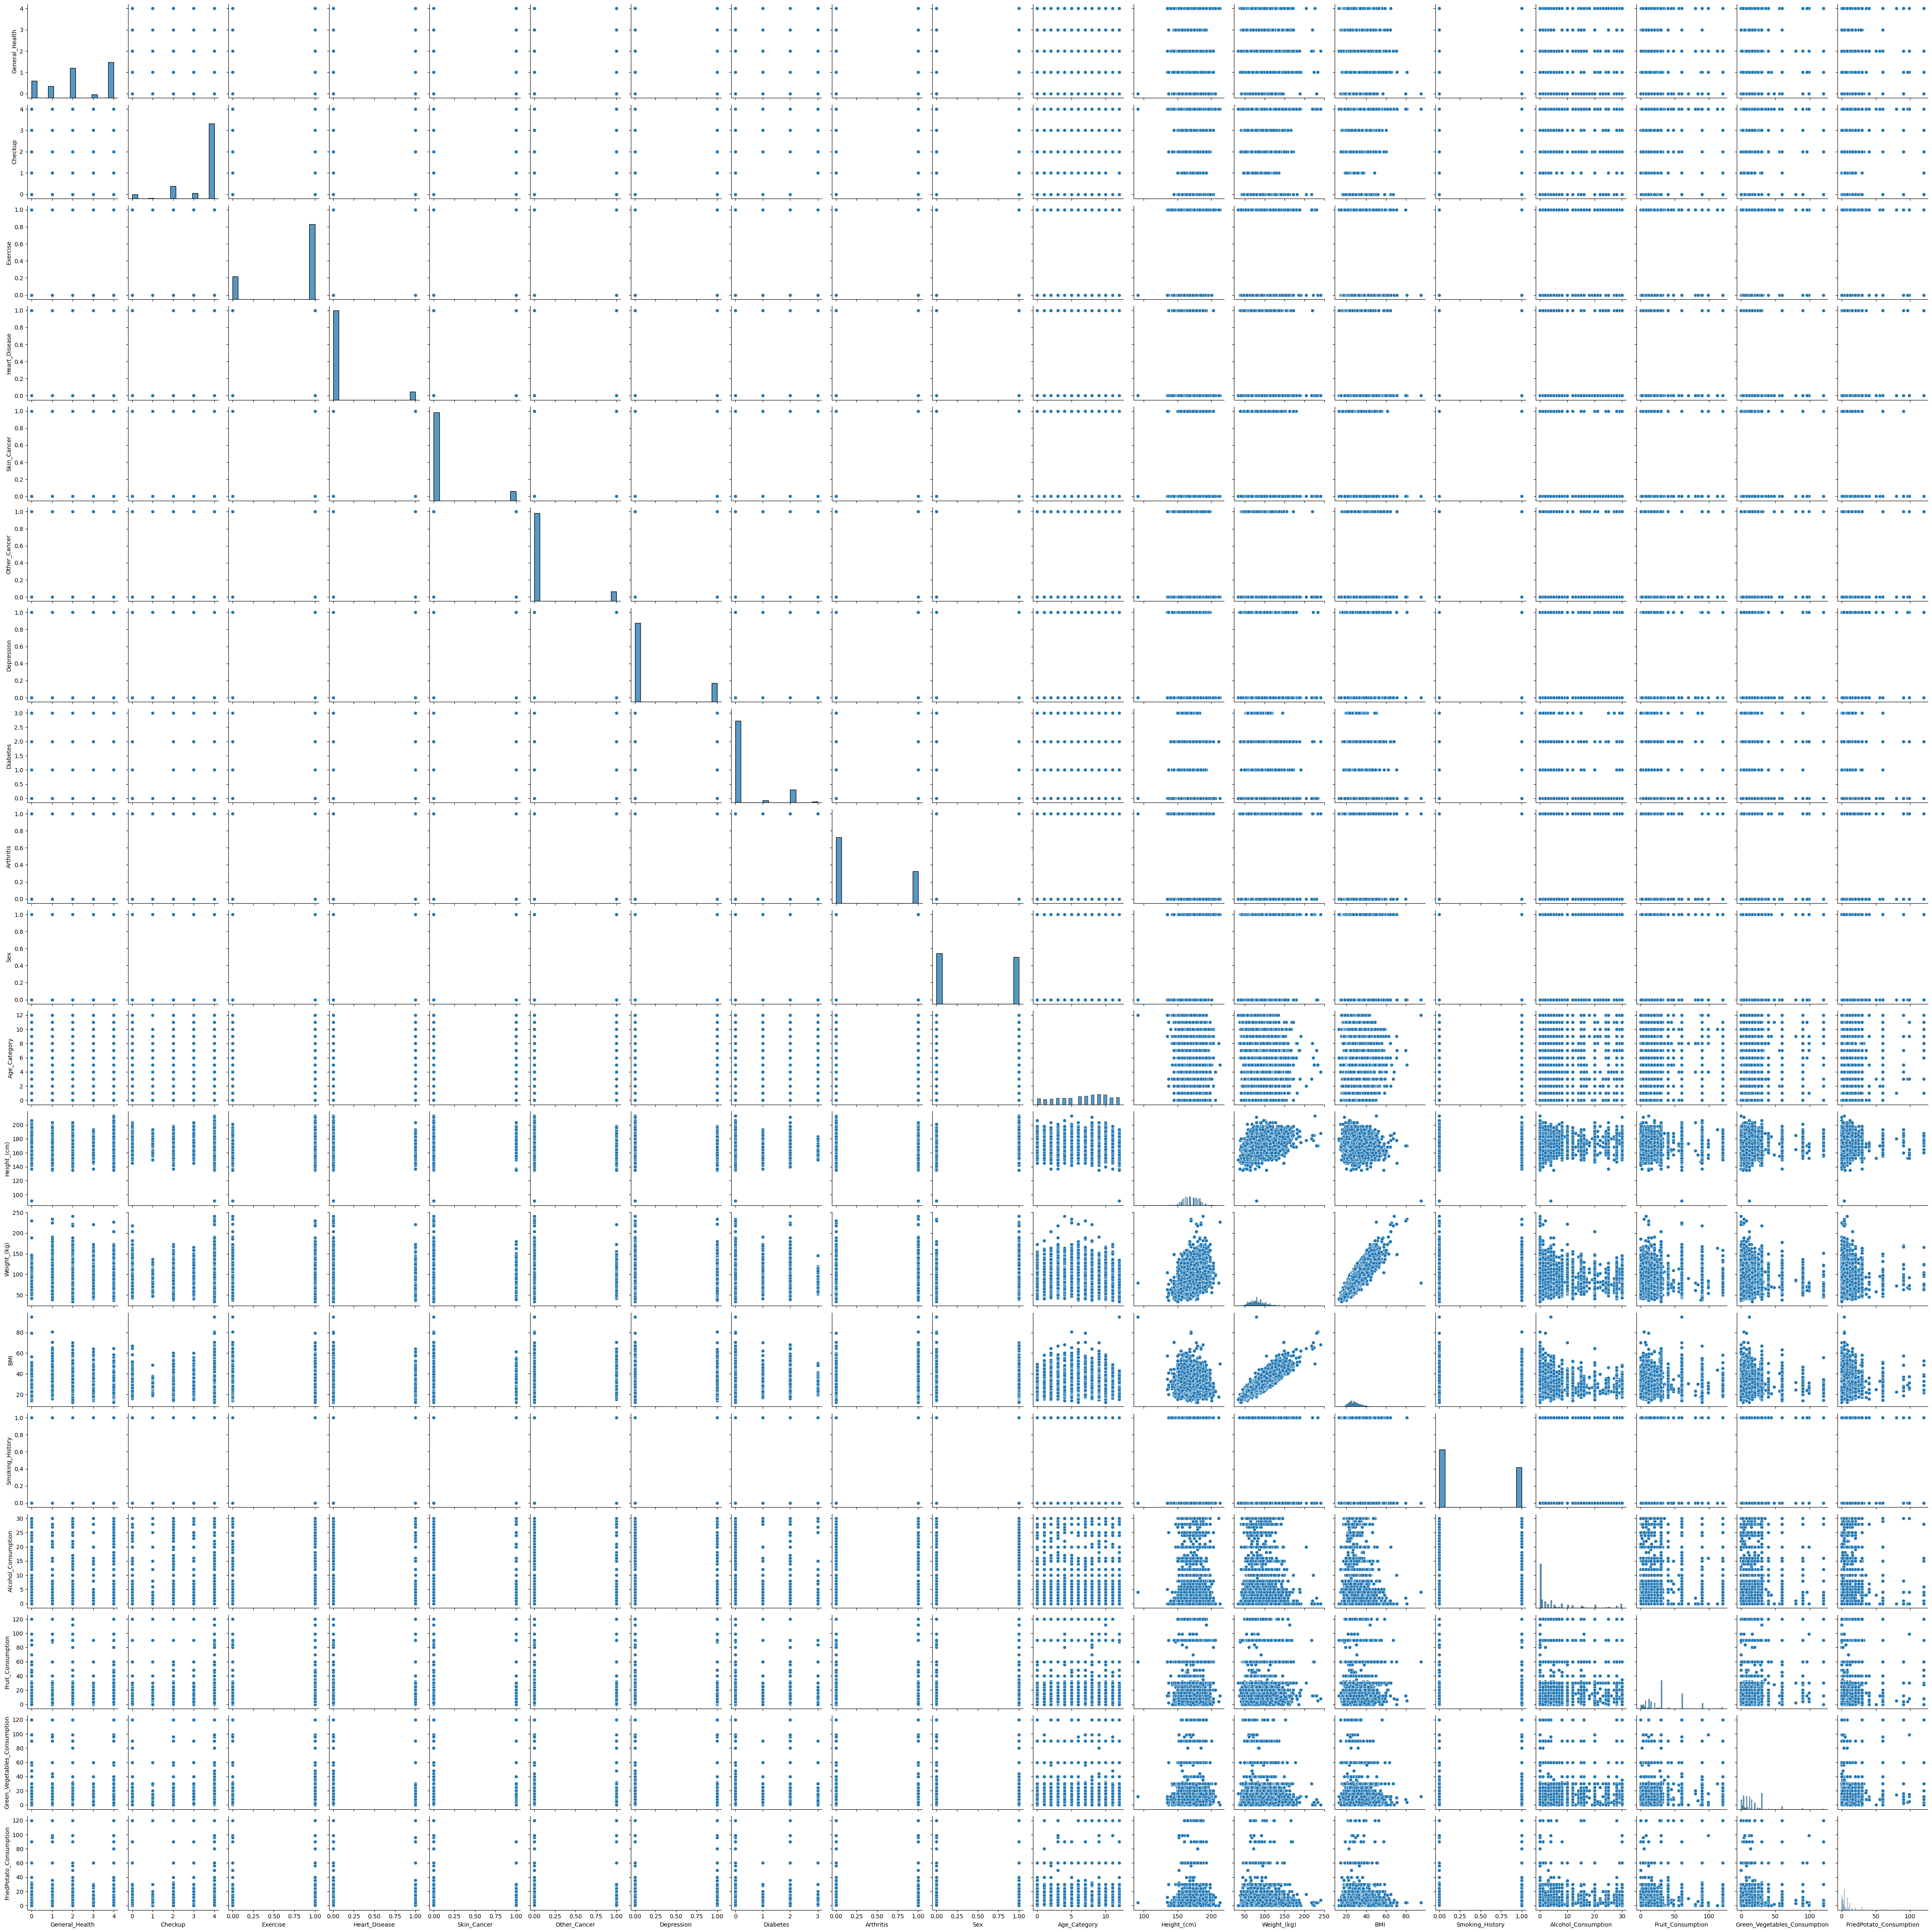

In [ ]:
sns.pairplot(df2)

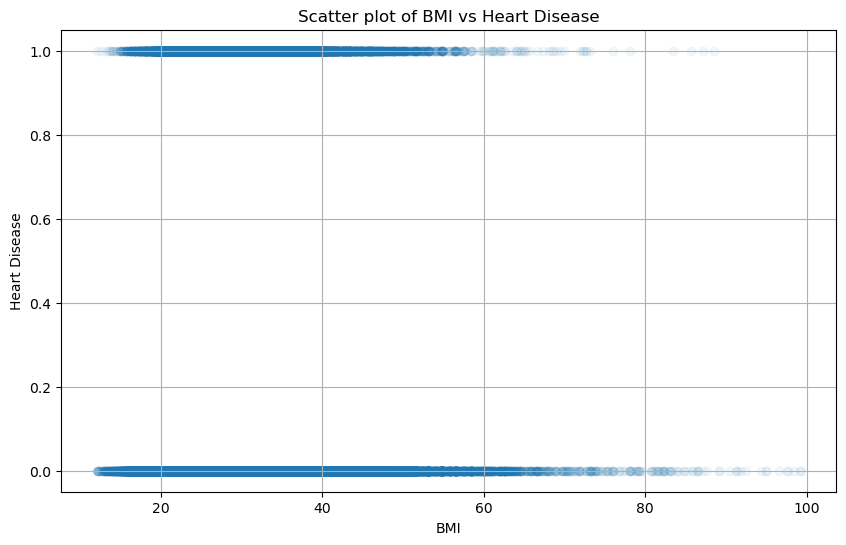

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['Heart_Disease'], alpha=0.05)  # Set alpha to 0.5 for 50% transparency
plt.xlabel('BMI')
plt.ylabel('Heart Disease')
plt.title('Scatter plot of BMI vs Heart Disease')
plt.grid(True)
plt.show()


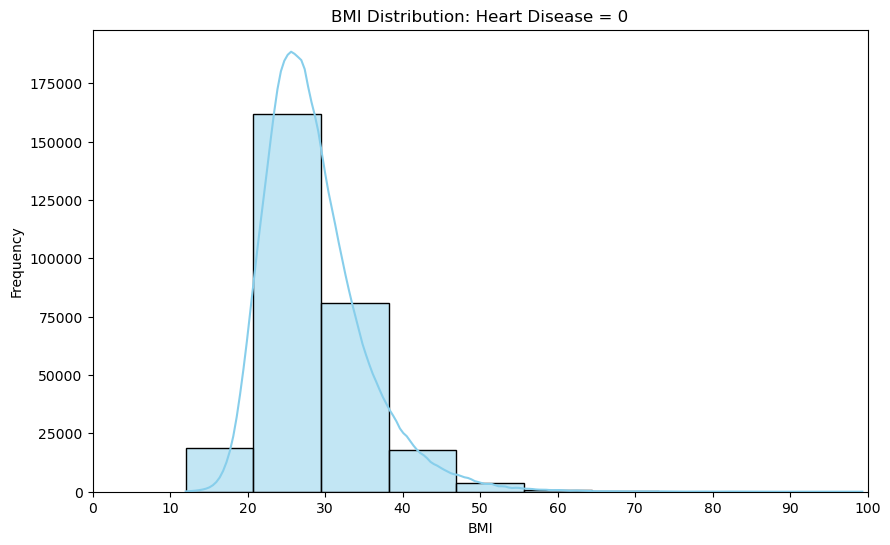

In [ ]:
# Filter the data where Heart_Disease is 0
df_no_disease = df[df['Heart_Disease'] == 0]

# Plot the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_no_disease['BMI'], kde=True, bins=10, color='skyblue')
plt.title('BMI Distribution: Heart Disease = 0')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis limits
plt.xticks(range(0, 101, 10))  # Setting ticks every 10 units
plt.show()

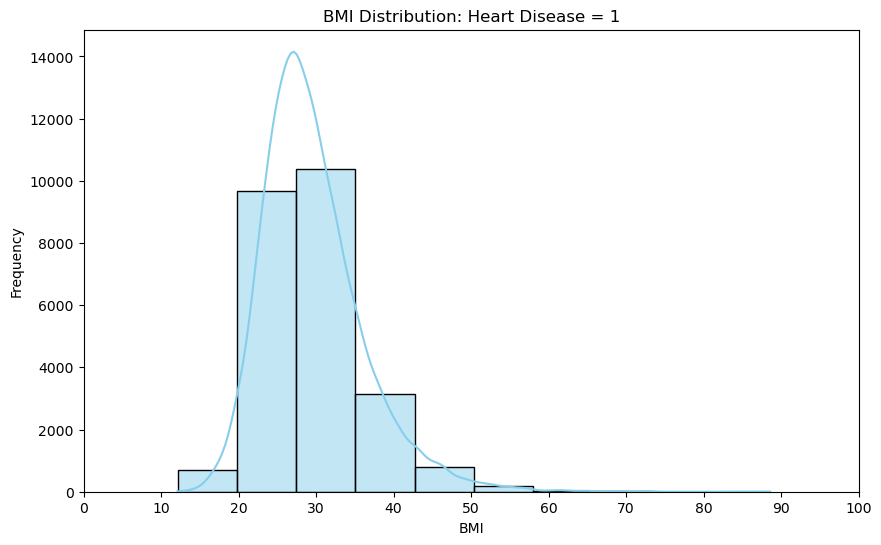

In [ ]:
# Filter the data where Heart_Disease is 1
df_no_disease = df[df['Heart_Disease'] == 1]

# Plot the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_no_disease['BMI'], kde=True, bins=10, color='skyblue')
plt.title('BMI Distribution: Heart Disease = 1')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis limits
plt.xticks(range(0, 101, 10))  # Setting ticks every 10 units
plt.show()

In [ ]:
# Define the range of weights (kg) and heights (meters)
min_weight, max_weight = 30, 200
min_height, max_height = 1, 2.5

# Calculate the number of possible weights and heights
num_weights = max_weight - min_weight + 1
num_heights = (max_height - min_height + 1) * 10  # Multiply by 10 for increments of 0.1 meters

# Total number of unique combinations
total_combinations = num_weights * num_heights

# Total number of people
total_people = 300000

# Probability of two people having the exact same weight and height
probability = 1 / total_combinations

# Expected number of pairs with the same weight and height
expected_pairs = total_people * probability

print("Probability of two people having the exact same weight and height: {:.10f}".format(probability))
print("Expected number of pairs with the same weight and height among 300,000 people: {:.2f}".format(expected_pairs))

Probability of two people having the exact same weight and height: 0.0002339181
Expected number of pairs with the same weight and height among 300,000 people: 70.18
